# 회구 연습문제
- section 01 : 항공권 가격 예측
- section 02 : 노트북 가격 예측
- section 03 : 중고차 가격 예측

## Section 01 : 항공권 가격 예측
- 항공권 티켓 가격을 예측하시오.
- 데이터
    - train : flight_train.csv
    - test  : flight_test.csv

- pred(예측값) : 가격
- 성능 RMSE 평가 지표에 따라 채점


In [97]:
import pandas as pd

train = pd.read_csv('./ch8_data/flight_train.csv')
test = pd.read_csv('./ch8_data/flight_test.csv')

print("Train",train.shape)
print("Test",test.shape)

Train (10505, 11)
Test (4502, 10)


In [98]:
train.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [99]:
test.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10505 non-null  object 
 1   flight            10505 non-null  object 
 2   source_city       10505 non-null  object 
 3   departure_time    10505 non-null  object 
 4   stops             10505 non-null  object 
 5   arrival_time      10505 non-null  object 
 6   destination_city  10505 non-null  object 
 7   class             10505 non-null  object 
 8   duration          10505 non-null  float64
 9   days_left         10505 non-null  int64  
 10  price             10505 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 902.9+ KB


In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           4502 non-null   object 
 1   flight            4502 non-null   object 
 2   source_city       4502 non-null   object 
 3   departure_time    4502 non-null   object 
 4   stops             4502 non-null   object 
 5   arrival_time      4502 non-null   object 
 6   destination_city  4502 non-null   object 
 7   class             4502 non-null   object 
 8   duration          4502 non-null   float64
 9   days_left         4502 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 351.8+ KB


In [102]:
cols = train.select_dtypes(include='object').columns
for col in cols:
    set_train = set(train[col])
    set_test = set(test[col])
    same = (set_train == set_test)
    if same:
        print(col,"\t 카테고리 동일")
    else:
        print(col,"\t 카테고리 동일하지 않음")

airline 	 카테고리 동일
flight 	 카테고리 동일하지 않음
source_city 	 카테고리 동일
departure_time 	 카테고리 동일
stops 	 카테고리 동일
arrival_time 	 카테고리 동일
destination_city 	 카테고리 동일
class 	 카테고리 동일


In [103]:
train['flight'].value_counts()

flight
UK-706     108
UK-832      99
UK-720      98
UK-828      98
UK-822      97
          ... 
6E-307       1
G8-7553      1
6E-796       1
6E-939       1
SG-5002      1
Name: count, Length: 1153, dtype: int64

In [104]:
!pip install matplotlib

<Axes: >

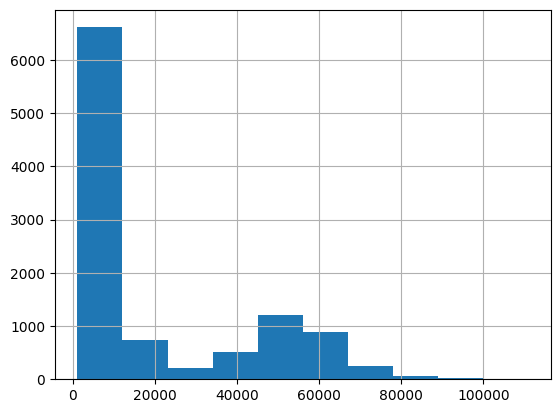

In [105]:
train['price'].hist()

In [106]:
target = train.pop("price")

train = train.drop('flight',axis=1)
test = test.drop('flight',axis=1)

In [107]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [108]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0
)

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr,y_tr, )

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [110]:
pred =rf.predict(X_val)
pred

array([ 6157.57, 11883.28,  7124.69, ..., 47457.72,  5117.65, 43706.72],
      shape=(2101,))

In [111]:
from sklearn.metrics import root_mean_squared_error

result =root_mean_squared_error(y_val,pred)
print("RMSE : ", result)

RMSE :  4376.841613585934


In [112]:
pred = rf.predict(test)

submit = pd.DataFrame({"pred":pred})
submit.to_csv("./ch8_data/section1_result1.csv", index=False)

### 성능 개선
- flight 컬럼 제외
- 포함하되 중복은 제외 -> 일부만 포함

- 데이터 전처리
    - 레이블 인코딩 : 효과 x
    - 스케일링 : Standard Scaler가 가장좋음.
    - flight 컬럼 : 앞의 영문은 airline의 약자 -> 숫자만 활용

- 하이퍼 파라미터 튜닝
    - max_depth : 10~20
    - n_estimators:200,500

In [113]:
import pandas as pd

train = pd.read_csv('./ch8_data/flight_train.csv')
test = pd.read_csv('./ch8_data/flight_test.csv')

In [114]:
target = train.pop("price")


In [115]:
train['f2'] = train['flight'].str.split('-').str[1].astype(int)
test['f2'] = test['flight'].str.split('-').str[1].astype(int)

train = train.drop('flight',axis=1)
test = test.drop('flight',axis=1)

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
cols = ['duration','days_left']

train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

In [118]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [119]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0
)

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 20, n_estimators=200, random_state=0)
rf.fit(X_tr,y_tr)
pred = rf.predict(X_val)

In [121]:
from sklearn.metrics import root_mean_squared_error
result = root_mean_squared_error(y_val,pred)
print('rsme: ', result)

rsme:  3675.155093297134


In [122]:
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("./ch8_data/section1_result2.csv", index=False)

## Section 02 : 노트북 정보로 가격을 예측하시오.
- 노트북 정보로 가격을 예측하시오.
- 데이터
    - train : laptop_train.csv
    - test  : laptop_test.csv

- pred(예측값) : 가격
- 성능은 결정계수의 평가지표에 따라 채점


In [123]:
import pandas as pd

train = pd.read_csv('./ch8_data/laptop_train.csv')
test = pd.read_csv('./ch8_data/laptop_test.csv')

print("TRAIN",train.shape)
print("TEST",test.shape)

TRAIN (91, 10)
TEST (39, 9)


In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               91 non-null     object 
 1   Model               82 non-null     object 
 2   Series              55 non-null     object 
 3   Processor           86 non-null     object 
 4   Processor_Gen       86 non-null     object 
 5   RAM                 85 non-null     float64
 6   Hard_Disk_Capacity  85 non-null     object 
 7   OS                  85 non-null     object 
 8   Rating              91 non-null     float64
 9   Price               91 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.2+ KB


In [125]:
train.isnull().sum()

Brand                  0
Model                  9
Series                36
Processor              5
Processor_Gen          5
RAM                    6
Hard_Disk_Capacity     6
OS                     6
Rating                 0
Price                  0
dtype: int64

In [126]:
test.isnull().sum()

Brand                  0
Model                  5
Series                14
Processor              2
Processor_Gen          2
RAM                    2
Hard_Disk_Capacity     2
OS                     2
Rating                 0
dtype: int64

In [127]:
cols = train.select_dtypes(include="object").columns
for col in cols:
    set_train = set(train[col])
    set_test = set(test[col])
    same = (set_train == set_test)
    if same:
        print(col,"컬럼 동일")
    else:
        print(col,'컬럼 미일치')

Brand 컬럼 미일치
Model 컬럼 미일치
Series 컬럼 미일치
Processor 컬럼 미일치
Processor_Gen 컬럼 미일치
Hard_Disk_Capacity 컬럼 미일치
OS 컬럼 미일치


In [128]:
train['Price'].describe()

count        91.000000
mean      53540.813187
std       21371.760428
min       17640.000000
25%       39490.000000
50%       46840.000000
75%       60194.500000
max      129990.000000
Name: Price, dtype: float64

In [129]:
target = train.pop('Price')
c_cols = ["Model","Series","Processor","Processor_Gen","Hard_Disk_Capacity","OS"]

train[c_cols] = train[c_cols].fillna("X")
test[c_cols] = test[c_cols].fillna("X")

In [130]:
n_cols = ['RAM']

train[n_cols] = train[n_cols].fillna(-1)
test[n_cols] = test[n_cols].fillna(-1)

In [132]:
combined = pd.concat([train,test])
combined_dummies = pd.get_dummies(combined)

In [133]:
n_train = len(train)
train = combined_dummies[:n_train]
test = combined_dummies[n_train:]

In [134]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state = 0
)

In [135]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr,y_tr)
pred = rf.predict(X_val)



In [136]:
from sklearn.metrics import r2_score

result = r2_score(y_val,pred)
print('result',result)

result 0.7496764602229047


In [138]:
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv('./ch8_data/section2_result1.csv', index=False)

### 성능 개선

- 데이터 전처리
    - series 컬럼 삭제
    - model 컬럼 삭제

- 하이퍼파라미터 튜닝

In [139]:
import pandas as pd

train = pd.read_csv('./ch8_data/laptop_train.csv')
test = pd.read_csv('./ch8_data/laptop_test.csv')

target = train.pop("Price")

train = train.drop('Series',axis=1)
test = test.drop("Series",axis=1)

train = train.drop('Model',axis=1)
test = test.drop('Model',axis=1)

c_cols = ['Processor','Processor_Gen','Hard_Disk_Capacity','OS']

train[c_cols] = train[c_cols].fillna('X')
test[c_cols] = test[c_cols].fillna("X")

n_cols = ['RAM']
train[n_cols] = train[n_cols].fillna(-1)
test[n_cols] = test[n_cols].fillna(-1)

combined = pd.concat([train,test])
combined_dummies = pd.get_dummies(combined)
n_train = len(train)

train = combined_dummies[:n_train]
test = combined_dummies[n_train:]



In [140]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state = 0
)


In [141]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

rf.fit(X_tr,y_tr)
pred = rf.predict(X_val)

In [142]:
from sklearn.metrics import r2_score

result = r2_score(y_val, pred)
print(result)

0.8042392429064131


In [143]:
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv('./ch8_data/section2_result2.csv', index=False)

## Section 03 : 자동차 정보로 중고차 가격을 예측하시오.
- 자동차 정보로 중고차 가격을 예측하시오.
- 데이터
    - train : car_train.csv
    - test  : car_test.csv

- pred(예측값) : 가격
- 성능은 RMSLE 평가지표에 따라 채점


In [144]:
import pandas as pd

train = pd.read_csv('./ch8_data/car_train.csv')
test = pd.read_csv('./ch8_data/car_test.csv')

In [145]:
print("Train",train.shape)
print("Test",test.shape)

Train (6732, 17)
Test (5772, 16)


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             6732 non-null   int64  
 1   Levy              6732 non-null   object 
 2   Manufacturer      6732 non-null   object 
 3   Model             6732 non-null   object 
 4   Prod. year        6732 non-null   int64  
 5   Category          6732 non-null   object 
 6   Leather interior  6732 non-null   object 
 7   Fuel type         6732 non-null   object 
 8   Engine volume     6732 non-null   object 
 9   Mileage           6732 non-null   object 
 10  Cylinders         6732 non-null   float64
 11  Gear box type     6732 non-null   object 
 12  Drive wheels      6732 non-null   object 
 13  Doors             6732 non-null   object 
 14  Wheel             6732 non-null   object 
 15  Color             6732 non-null   object 
 16  Airbags           6732 non-null   int64  


In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5772 entries, 0 to 5771
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              5772 non-null   object 
 1   Manufacturer      5772 non-null   object 
 2   Model             5772 non-null   object 
 3   Prod. year        5772 non-null   int64  
 4   Category          5772 non-null   object 
 5   Leather interior  5772 non-null   object 
 6   Fuel type         5772 non-null   object 
 7   Engine volume     5772 non-null   object 
 8   Mileage           5772 non-null   object 
 9   Cylinders         5772 non-null   float64
 10  Gear box type     5772 non-null   object 
 11  Drive wheels      5772 non-null   object 
 12  Doors             5772 non-null   object 
 13  Wheel             5772 non-null   object 
 14  Color             5772 non-null   object 
 15  Airbags           5772 non-null   int64  
dtypes: float64(1), int64(2), object(13)
memory

In [148]:
target = train.pop("Price")

In [151]:
cols = train.select_dtypes(include='object').columns

for col in cols:
    set_train = set(train[col])
    set_test = set(test[col])
    same = (set_train == set_test)
    if same:
        print(col,"카테고리 동일")
    else:
        print(col,"카테고리 미 일치")

Levy 카테고리 미 일치
Manufacturer 카테고리 미 일치
Model 카테고리 미 일치
Category 카테고리 동일
Leather interior 카테고리 동일
Fuel type 카테고리 미 일치
Engine volume 카테고리 미 일치
Mileage 카테고리 미 일치
Gear box type 카테고리 동일
Drive wheels 카테고리 동일
Doors 카테고리 동일
Wheel 카테고리 동일
Color 카테고리 동일


In [ ]:
# 미일치 항목
# Levy
# Manufacturer
# Model
# Fuel type
# Engine volume
# Mileage


In [152]:
from sklearn.preprocessing import LabelEncoder
combined = pd.concat([train,test])

for col in cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col])

n_train = len(train)
train=combined[:n_train]
test = combined[n_train:]

In [153]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0
)

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

rf.fit(X_tr,y_tr)
pred = rf.predict(X_val)

In [156]:
from sklearn.metrics import root_mean_squared_log_error

result = root_mean_squared_log_error(y_val,pred)
print(result)

1.1011992916981865


In [157]:
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv('./ch8_data/section3_result.csv', index=False)

### 성능 개선
- Engine Volume 컬럼 EDA
- Mileage 컬럼 EDA

In [158]:
train = pd.read_csv("./ch8_data/car_train.csv")

In [ ]:
train['Engine volume'].value_counts()

# #.# Turbo 로 붙어있음.

Engine volume
2            1342
2.5           823
1.8           623
1.6           533
1.5           453
             ... 
0.8 Turbo       1
3.1             1
4.6 Turbo       1
4.2 Turbo       1
4.8 Turbo       1
Name: count, Length: 91, dtype: int64

In [163]:
train['Mileage'].str.split().str[1].value_counts()

Mileage
km    6732
Name: count, dtype: int64

###
- 데이터 전처리 
    - Engine Volume 컬럼 ; 자료형을 int로 변경 , turbo 컬럼 생성
    - Mileage 컬럼 : 단위 지우기
- 하어퍼파라미터 튜닝
    - max_depth :15,20
    - n_estimators : 200

In [207]:
import pandas as pd

train = pd.read_csv("./ch8_data/car_train.csv")
test = pd.read_csv("./ch8_data/car_test.csv")

In [208]:
target = train.pop('Price')


In [209]:
train['Turbo'] = train['Engine volume'].str.contains("Turbo").astype(int)
train['Engine volume'] = train['Engine volume'].str.replace('Turbo','').astype(float)

test['Turbo'] = test['Engine volume'].str.contains('Turbo').astype(int)
test['Engine volume']= test['Engine volume'].str.replace('Turbo','').astype(float)

In [210]:
train['Mileage'] = train['Mileage'].str.split().str[0].astype(int)
test['Mileage'] = test['Mileage'].str.split().str[0].astype(int)

In [212]:
from sklearn.preprocessing import LabelEncoder

combined = pd.concat([train,test])
combined

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,603,LEXUS,RX 450,2015,Jeep,Yes,Hybrid,3.5,143619,6.0,Automatic,4x4,04-May,Left wheel,Black,12,0
1,640,SSANGYONG,REXTON,2013,Jeep,Yes,Diesel,2.0,111307,4.0,Automatic,Front,04-May,Left wheel,White,4,0
2,1493,MERCEDES-BENZ,GLE 350,2016,Jeep,Yes,Petrol,3.5,91493,6.0,Automatic,Rear,04-May,Left wheel,Black,0,0
3,475,FIAT,500,2012,Sedan,Yes,Petrol,1.4,88000,4.0,Tiptronic,Front,02-Mar,Left wheel,Black,6,0
4,639,CHEVROLET,Orlando,2014,Jeep,Yes,Diesel,2.0,177103,4.0,Automatic,Front,04-May,Left wheel,White,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,900,HONDA,Cr-v,2015,Jeep,Yes,Petrol,2.4,80288,4.0,Automatic,4x4,04-May,Left wheel,Brown,12,0
5768,978,TOYOTA,Corolla,2019,Sedan,Yes,Petrol,1.8,54307,4.0,Automatic,Front,04-May,Left wheel,Black,12,0
5769,-,BMW,M3,2000,Coupe,Yes,Petrol,2.5,222222,6.0,Manual,Rear,02-Mar,Right-hand drive,Silver,2,0
5770,765,HYUNDAI,Sonata,2015,Sedan,Yes,Petrol,2.0,25787,4.0,Automatic,Front,04-May,Left wheel,White,4,0


In [214]:
cols = train.select_dtypes(include='object').columns
cols

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel',
       'Color'],
      dtype='object')

In [215]:
for col in cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col])

    

In [217]:
n_train = len(train)
train = combined[:n_train]
test=combined[n_train:]

In [218]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0
)

In [219]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_tr,y_tr)
pred=rf.predict(X_val)

In [220]:
pred

array([25116.79 , 16440.275, 10785.695, ...,  1269.64 , 48727.755,
       23457.735], shape=(1347,))

In [221]:
from sklearn.metrics import root_mean_squared_log_error
result=root_mean_squared_log_error(y_val,pred)
print('rmsle',result)

rmsle 1.082016203127291


In [222]:
pred = rf.predict(test)
pred

array([39999.245, 10820.88 , 16399.925, ..., 10624.315, 26257.115,
       15435.085], shape=(5772,))

In [223]:
submit = pd.DataFrame({'pred':pred})
submit.to_csv('./ch8_data/section3_result2.csv', index=False)